In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("neo.csv",index_col=False)
df = df.drop(["id","name","orbiting_body","sentry_object"],axis=1)
df["hazardous"] = np.where(df["hazardous"] == False, 0, 1)
x = df.drop(["hazardous"],axis=1)
y= df["hazardous"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.9)

In [4]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

sm = SMOTE(random_state = 10)
X_trainN, y_trainN = sm.fit_resample(X_train, y_train)



print("After OverSampling, counts of label '1': {}".format(sum(y_trainN == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_trainN == 0)))


Before OverSampling, counts of label '1': 7988
Before OverSampling, counts of label '0': 73764 

After OverSampling, counts of label '1': 73764
After OverSampling, counts of label '0': 73764


## Decision Tree

In [7]:
model = tree.DecisionTreeClassifier()

In [8]:
model = model.fit(X_train,y_train)

In [9]:
yhat = model.predict(X_test)

In [10]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='micro')

0.9026860413914575

In [11]:
from sklearn.metrics import classification_report
target_name=['false','true']
print(classification_report(y_test, yhat, target_names=target_name))

              precision    recall  f1-score   support

       false       0.95      0.95      0.95      8232
        true       0.48      0.48      0.48       852

    accuracy                           0.90      9084
   macro avg       0.71      0.71      0.71      9084
weighted avg       0.90      0.90      0.90      9084



## Random Forest classification

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(n_estimators=1000,
                               criterion='gini', 
                               max_depth=None,
                               min_samples_split=2, 
                               min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, 
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               bootstrap=True, 
                               oob_score=False,
                               n_jobs=-1,
                               random_state=3,
                               verbose=0, 
                               warm_start=False,
                               class_weight=None,
                               ccp_alpha=0.0,
                               max_samples=0.1)

In [14]:
model= model.fit(X_train, y_train)

In [15]:
yhat = model.predict(X_test)

In [16]:
f1_score(y_test, yhat, average='micro')

0.916116248348745

In [17]:
target_name=['false','true']
print(classification_report(y_test, yhat, target_names=target_name))

              precision    recall  f1-score   support

       false       0.92      0.99      0.96      8232
        true       0.69      0.19      0.30       852

    accuracy                           0.92      9084
   macro avg       0.81      0.59      0.63      9084
weighted avg       0.90      0.92      0.89      9084



## XGBoost 

In [19]:
from xgboost import XGBClassifier as xgbc

In [20]:
model =  xgbc(n_estimators =1000, n_jobs=-1,eval_metric="auc")

In [21]:
evaluation = [( X_train, y_train), ( X_test, y_test)]
model=model.fit(X_train, y_train,
            eval_set=evaluation,
            early_stopping_rounds=10,verbose=False)

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [22]:
yhat = model.predict(X_test)

In [23]:
f1_score(y_test, yhat, average='micro')

0.9200792602377807

In [24]:
target_name=['false','true']
print(classification_report(y_test, yhat, target_names=target_name))

              precision    recall  f1-score   support

       false       0.93      0.99      0.96      8232
        true       0.72      0.24      0.36       852

    accuracy                           0.92      9084
   macro avg       0.82      0.62      0.66      9084
weighted avg       0.91      0.92      0.90      9084



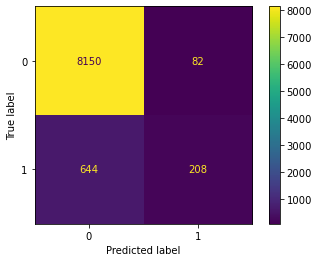

In [26]:
from sklearn.metrics import *

confusion_matrix = confusion_matrix(y_test, yhat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()